<a href="https://colab.research.google.com/github/rachittayal123/advanced-computer-vision-n-video-analytics/blob/main/lab_1_rachit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RACHIT TAYAL e22cseu0118

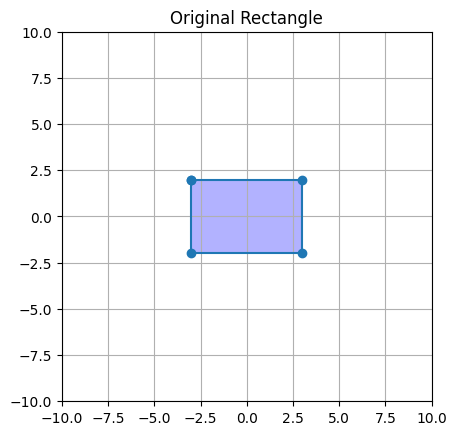

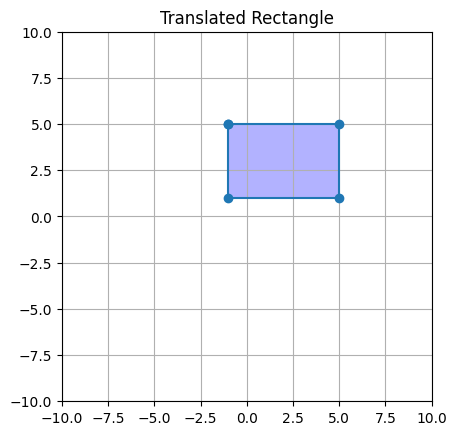

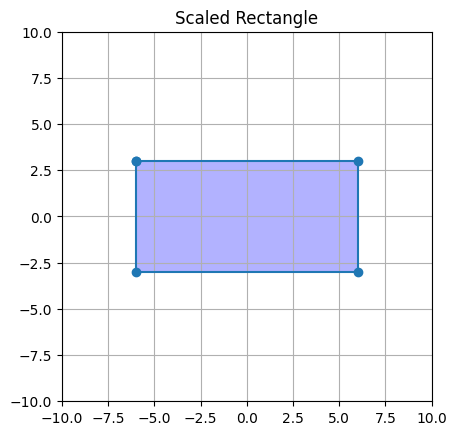

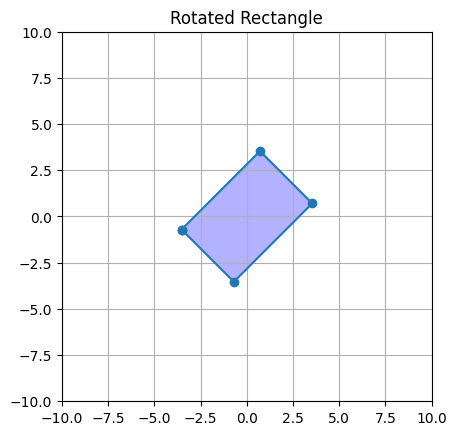

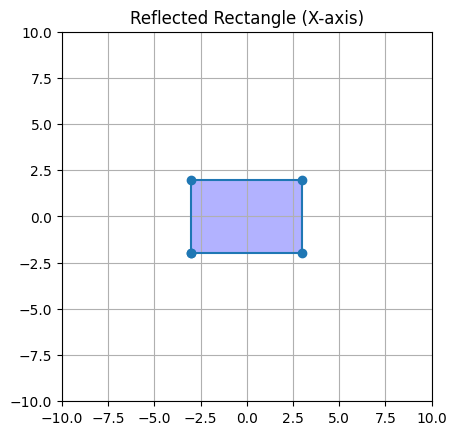

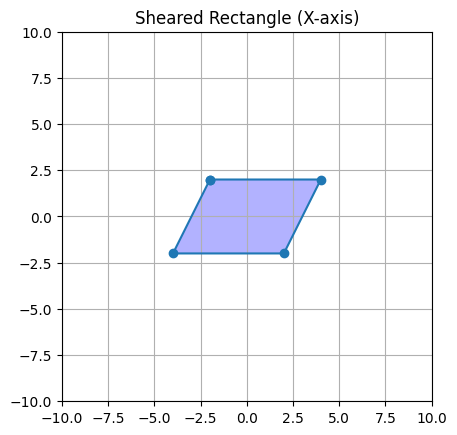

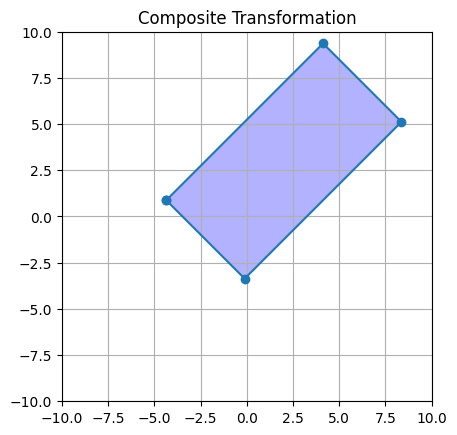

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot 2D shape (polygon)
def plot_shape(vertices, title="Shape"):
    # Closing the polygon
    vertices = np.vstack([vertices, vertices[0]])  # Add the first vertex to the end to close the polygon
    plt.plot(vertices[:, 0], vertices[:, 1], marker='o')
    plt.fill(vertices[:, 0], vertices[:, 1], 'b', alpha=0.3)
    plt.title(title)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()

# Define the vertices of a rectangle (4 points)
# Rectangle coordinates: (x1, y1), (x2, y2), (x3, y3), (x4, y4)
rectangle = np.array([
    [-3, 2],   # Vertex 1 (x1, y1)
    [3, 2],    # Vertex 2 (x2, y2)
    [3, -2],   # Vertex 3 (x3, y3)
    [-3, -2]   # Vertex 4 (x4, y4)
])

# 1. Translation
def translate(vertices, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    ones = np.ones(vertices.shape[0]).reshape(-1, 1)
    vertices_homogeneous = np.hstack([vertices, ones])  # Convert to homogeneous coordinates
    translated_vertices = vertices_homogeneous @ translation_matrix.T
    return translated_vertices[:, :2]  # Return the x, y coordinates

# 2. Scaling
def scale(vertices, sx, sy):
    scaling_matrix = np.array([[sx, 0], [0, sy]])
    scaled_vertices = vertices @ scaling_matrix.T
    return scaled_vertices

# 3. Rotation
def rotate(vertices, angle):
    angle_rad = np.deg2rad(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], [np.sin(angle_rad), np.cos(angle_rad)]])
    rotated_vertices = vertices @ rotation_matrix.T
    return rotated_vertices

# 4. Reflection
def reflect(vertices, axis='x'):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0], [0, -1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0], [0, 1]])
    reflected_vertices = vertices @ reflection_matrix.T
    return reflected_vertices

# 5. Shearing
def shear(vertices, sx, sy):
    shearing_matrix = np.array([[1, sx], [sy, 1]])
    sheared_vertices = vertices @ shearing_matrix.T
    return sheared_vertices

# Combine multiple transformations into one composite transformation
def composite_transformation(vertices, transformations):
    result_vertices = vertices
    for transformation in transformations:
        result_vertices = transformation(result_vertices)
    return result_vertices

# Visualize the transformations

# Original Rectangle
plot_shape(rectangle, "Original Rectangle")

# 1. Translation by (2, 3)
translated_rectangle = translate(rectangle, 2, 3)
plot_shape(translated_rectangle, "Translated Rectangle")

# 2. Scaling by a factor of 2 on x and 1.5 on y
scaled_rectangle = scale(rectangle, 2, 1.5)
plot_shape(scaled_rectangle, "Scaled Rectangle")

# 3. Rotation by 45 degrees
rotated_rectangle = rotate(rectangle, 45)
plot_shape(rotated_rectangle, "Rotated Rectangle")

# 4. Reflection across the X-axis
reflected_rectangle = reflect(rectangle, axis='x')
plot_shape(reflected_rectangle, "Reflected Rectangle (X-axis)")

# 5. Shearing with sx=0.5 and sy=0
sheared_rectangle = shear(rectangle, 0.5, 0)
plot_shape(sheared_rectangle, "Sheared Rectangle (X-axis)")

# 6. Composite Transformation: Scale, Rotate, then Translate
composite_rectangle = composite_transformation(rectangle, [
    lambda v: scale(v, 2, 1.5),
    lambda v: rotate(v, 45),
    lambda v: translate(v, 2, 3)
])
plot_shape(composite_rectangle, "Composite Transformation")

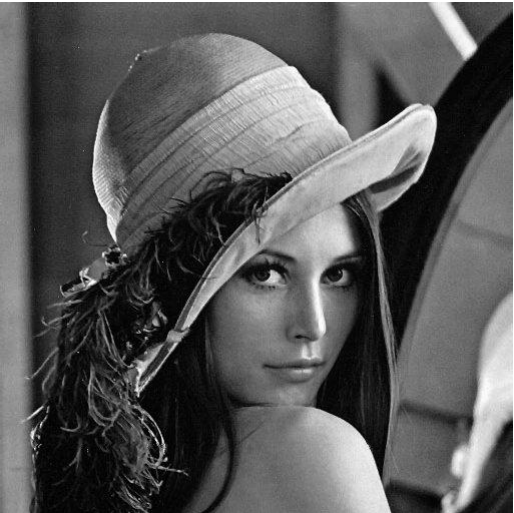

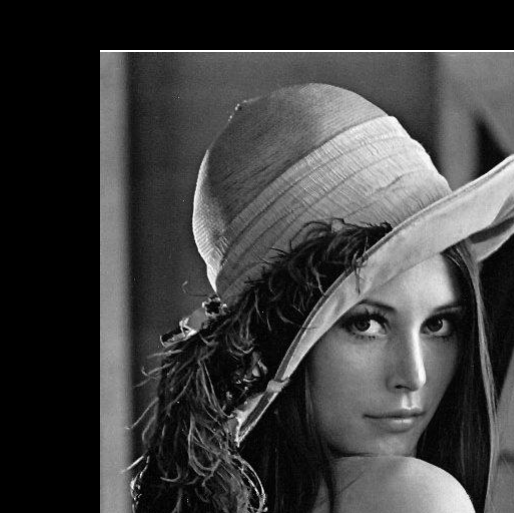

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Load the image
image = cv2.imread('/content/rachit.png')

# Get the dimensions of the image
height, width = image.shape[:2]

# Define the translation values
tx, ty = 100, 50

# Create the translation matrix
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

# Apply the translation
translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

# Display the original and translated images
cv2_imshow(image)
cv2_imshow(translated_image)


# Save the translated image
cv2.imwrite('translated_image.jpg', translated_image)

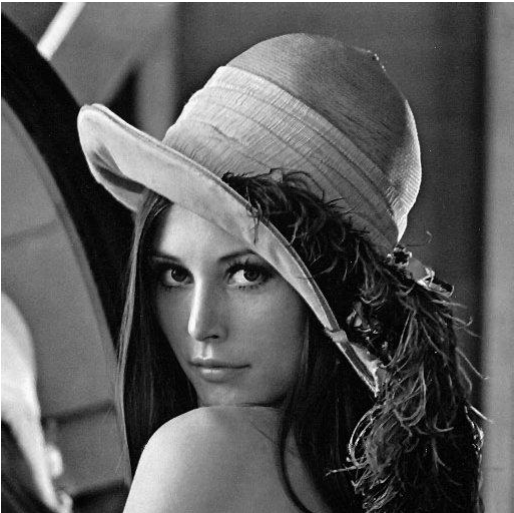

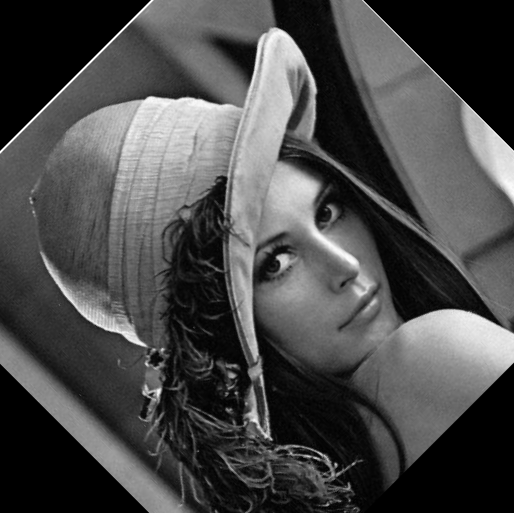

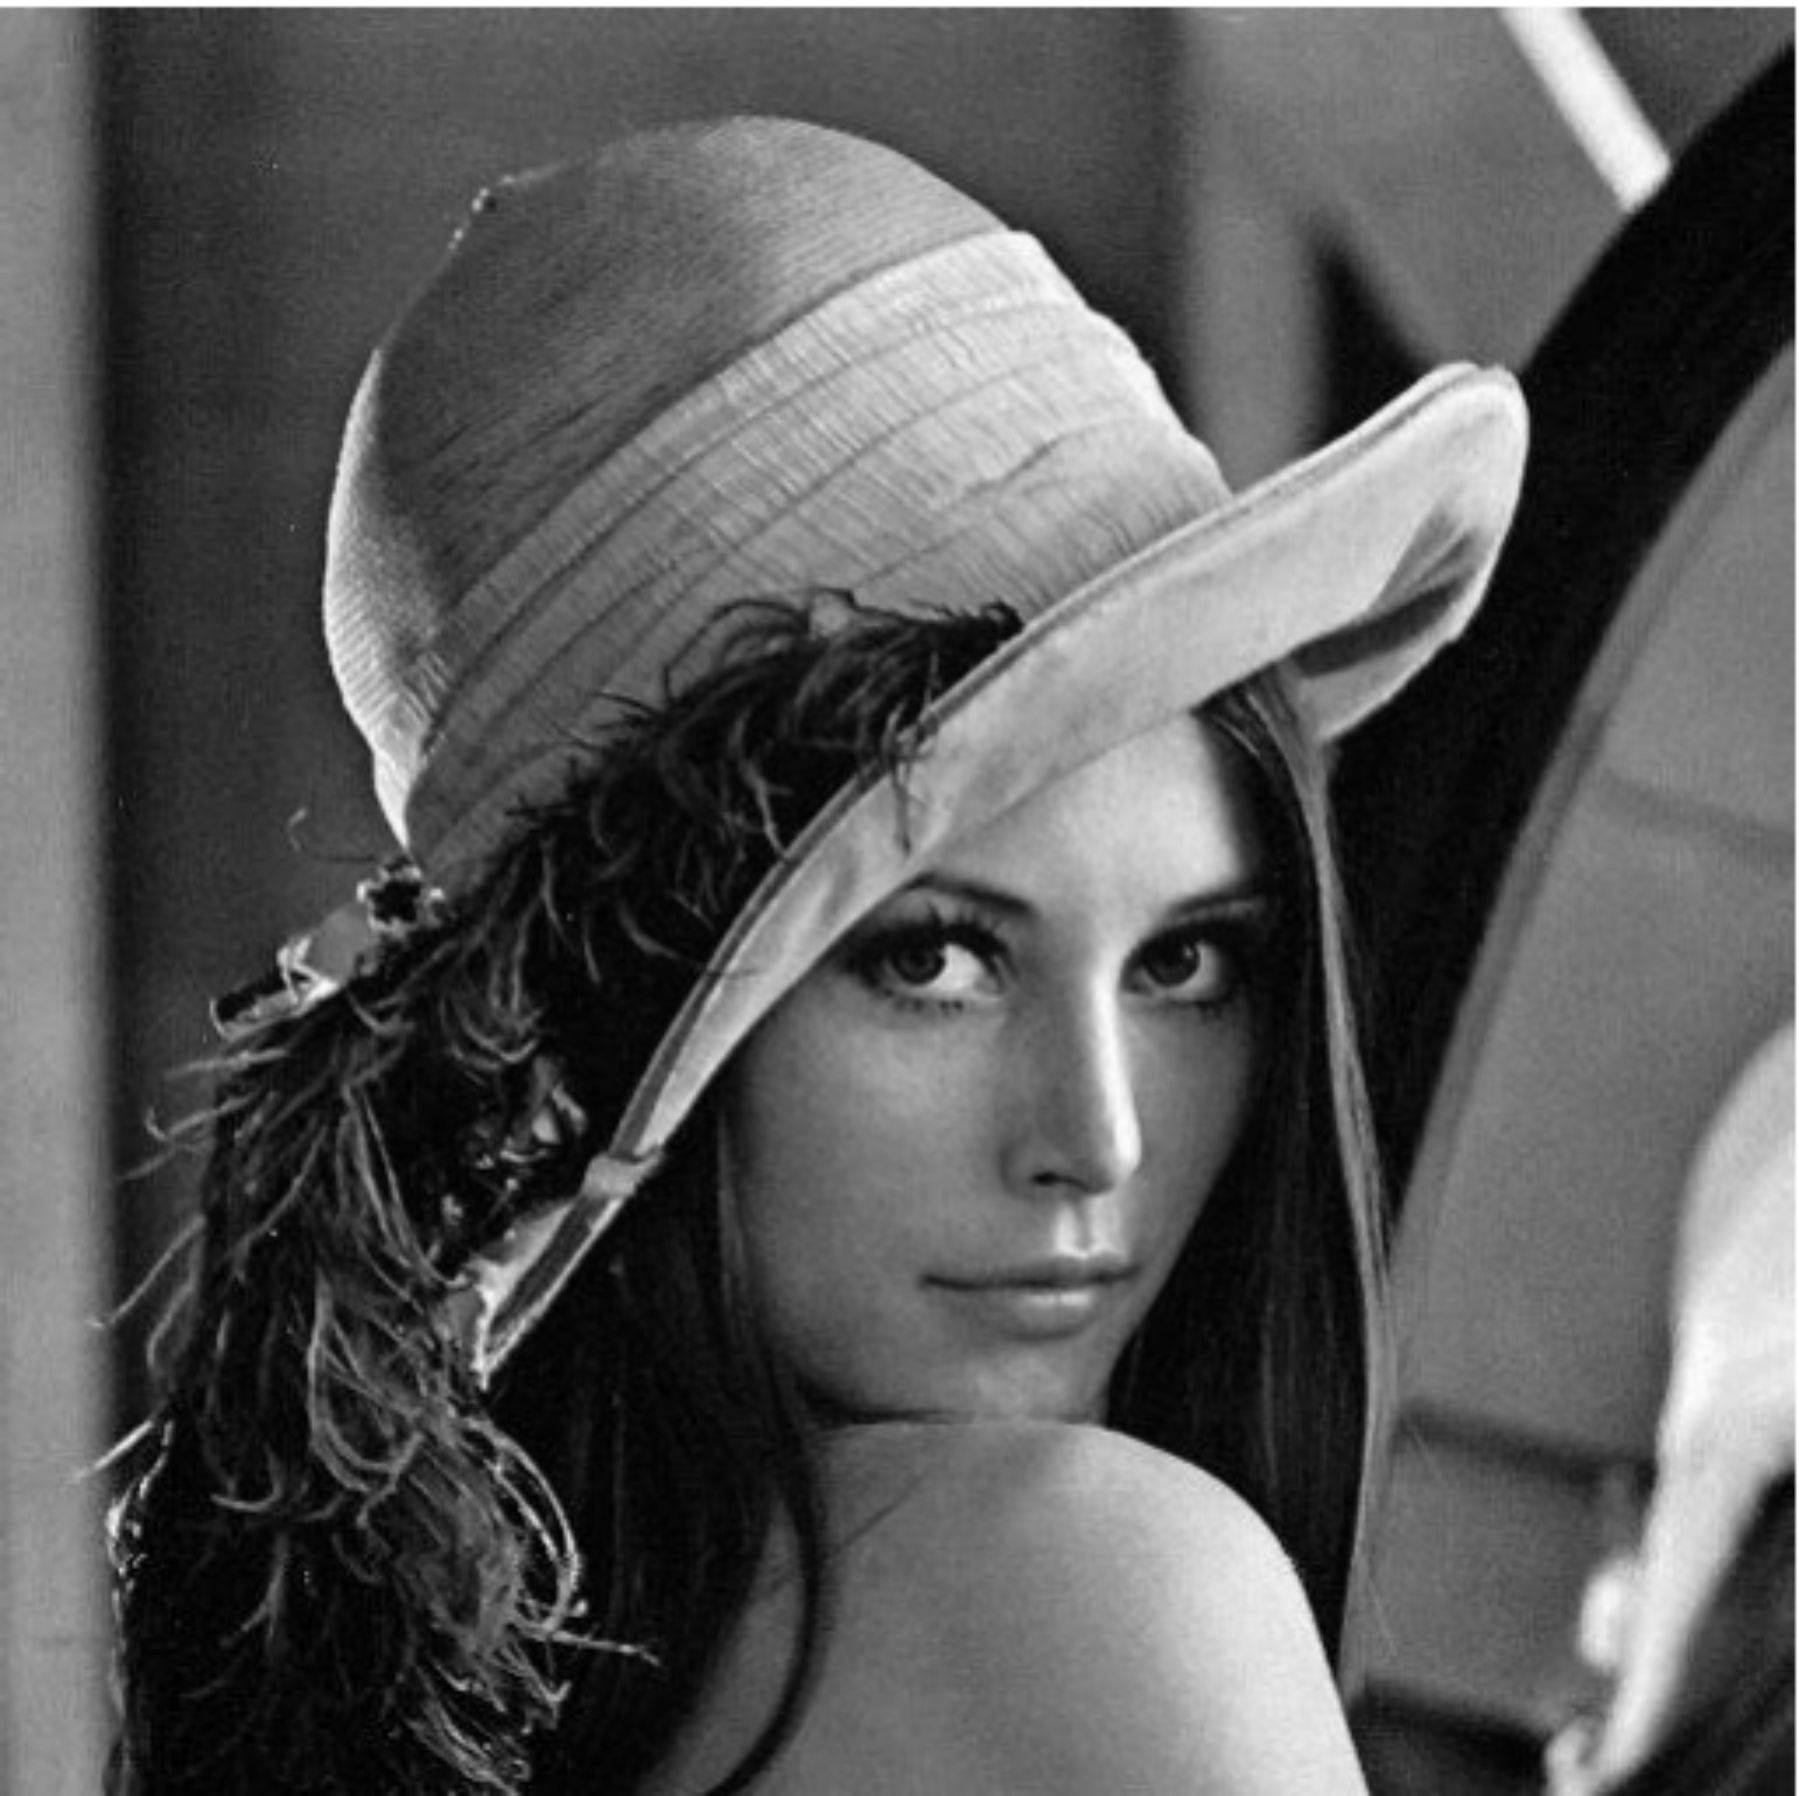

In [ ]:
# reflection
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
reflected_image = cv2.flip(image, 1)
cv2_imshow(reflected_image)

# Rotate
center = (width / 2, height / 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
from google.colab.patches import cv2_imshow
cv2_imshow(rotated_image)

# Scale
scaled_image = cv2.resize(image, None, fx=3.5, fy=3.5, interpolation=cv2.INTER_LINEAR)
from google.colab.patches import cv2_imshow
cv2_imshow(scaled_image)

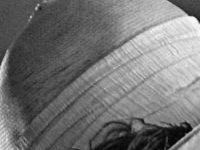

In [ ]:
#crop
crop_image = image[50:200, 100:300]
from google.colab.patches import cv2_imshow
cv2_imshow(crop_image)

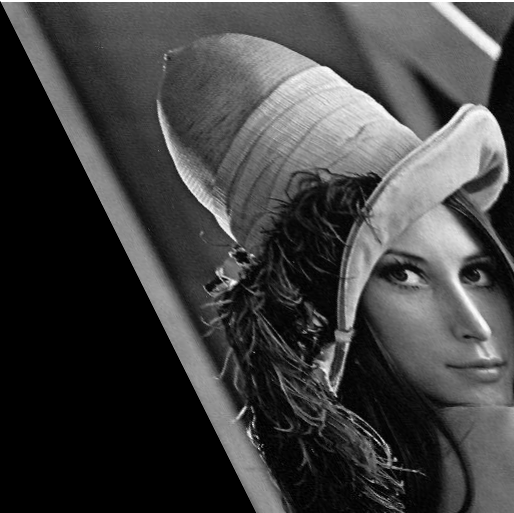

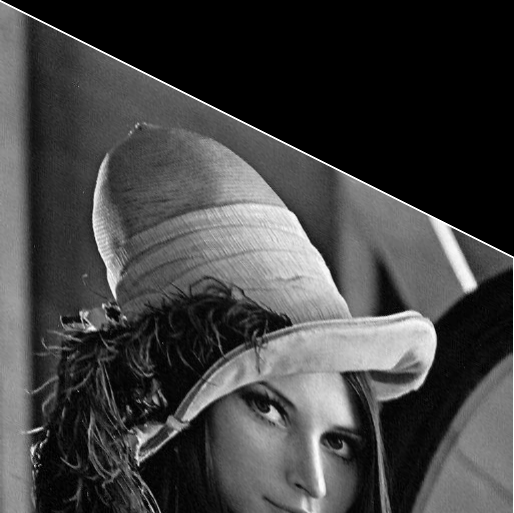

In [ ]:
#shearing in x-axis
shear_matrix_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_image_x = cv2.warpAffine(image, shear_matrix_x, (width, height))
from google.colab.patches import cv2_imshow
cv2_imshow(sheared_image_x)

# Shearing in y-axis
shear_matrix_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_image_y = cv2.warpAffine(image, shear_matrix_y, (width, height))
from google.colab.patches import cv2_imshow
cv2_imshow(sheared_image_y)